# Running Experiments on CrisisLexT26 Dataset
The initial project used the CrisisLexT26 dataset, [here](https://crisislex.org/data-collections.html#CrisisLexT26), and ran four experiments. Of the four experiments, two attempted to match crowd-sourced data in the CrisisLexT26 dataset with data produced from a large language model whilst the other two focused on metadata. The four experiments were:

- **Informativeness**,
- **Information Type**,
- **Crisis Type**, and
- **Country Impacted**.

These experiments were run to understand how well a generic large language model would perform labelling unseen data. For this project zero-shot prompting was used.

This notebook has been set up to enable anyone to run the experiments and receive results. The members of the project do add the caveat that large language models are designed to communicate like humans. What has not been tested, as part of this work, is do large language models produce different results to the same question. The assumption is they can but through prompting the project team has tried to ensure reprodicable results but can not guarantee results from one run to the next.

### Step 1 - Clone the project GitHub repo
The experiments run as part of this project can be replicated using code stored in the publicly available GitHub repo [here](https://github.com/Crisitunity-Lab/ARDC-Project). To access parsers, response collection fucntions and evaluators, clone the GitHub repo to the local environment.

In [1]:
# Clone GitHub repo
user = "Crisitunity-Lab"
repo = "ARDC-Project"

!git clone https://github.com/$user/$repo /content/repo

Cloning into '/content/repo'...
remote: Enumerating objects: 481, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 481 (delta 17), reused 32 (delta 14), pack-reused 437
Receiving objects: 100% (481/481), 5.15 MiB | 14.13 MiB/s, done.
Resolving deltas: 100% (244/244), done.


### Step 2 Install requirements
All python library requirements for this experiment are contained in a requirements.txt file and can be run with the below.

In [2]:
%pip install -r /content/repo/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 30.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 117.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.

In [3]:
# Import langchain library
from langchain import HuggingFacePipeline

# Import bespoke functions
import repo.src.structure_extractor.data_utils as du
import repo.src.structure_extractor.model_utils as mu

# Step 3 Get data
Using the pre-built functions in the data utils file, provide a link to the zipped data and a destination directory. Data will be downloaded and unzipped to the destination directory. The source dataset contains multiple files in each directory. The files include in each directory include:
- A README.md file containing general information about the files in the folder.
- A JSON file containing information about the event and other pieces of metadata.
- A labelled tweets comma separated values (CSV) file named \<crisis_event>-
tweets_labeled.csv. This file contains labelled tweets.
- A CSV file containing a list of identifiers for all tweets associated with the event. The file is
named \<crisis_event>-tweetids_entire_period.csv.

For this experiment only the _\<crisis_event>-tweets_labeled.csv_ is required.

In [4]:
# Get data from online source and unzip to local directory
zip_file_url = "https://github.com/sajao/CrisisLex/blob/master/releases/CrisisLexT26-v1.0.zip?raw=true"
dest_folder = "/content/data/"

du.unzip_from_url(src=zip_file_url, dest=dest_folder)

Download and Unzip complete


Data is now stored at /content/data/CrisisLexT26 within the Google Colab environment.

###Step 4 Combine data into single dataframe
As the data is spread across multiple CSV files the *combine_csv_files* function will bring together the tweets_labelled file in each directory in a single file.

**NOTE**: Some tweets in the dataset have very few words. Having little data in the tweet makes it difficult for anyone, let alone a large language model, to understand what the tweet is about. The minimum length of a tweet can be set and tweets with fewer words than the minimum are excluded. "Words" doesn't include hashtags, links and user tags.  

In [5]:
# Set the folder name for where the data is stored
data_folder_name = "CrisisLexT26"
data_loc = dest_folder + data_folder_name
min_tweet_length = 6

# Combine csv's into a single dataframe. By default the folder the data is stored in is included as a
# new field called "label", but this can be turned off by setting the retrieve_label parameter to False.
df = du.combine_csv_files(data_loc, min_tweet_len=min_tweet_length)

In [6]:
# Data is now in a nice dataframe
df.head(10)

,Tweet ID,Tweet Text,Information Source,Information Type,Informativeness,label,year,country_code,crisis_type
0,203440928084602880,E #Navelli... a che punto siamo? Dov'è il pian...,Outsiders,Other Useful Information,Related - but not informative,2012_Italy_earthquakes,2012,IT,Earthquake
1,203843778409283584,"RT @andmarini: #Modena Strage di Brindisi, all...",Not labeled,Not labeled,Not related,2012_Italy_earthquakes,2012,IT,Earthquake
2,204030290715348993,#Terremoto ! in alto si sente parecchio,Outsiders,Sympathy and support,Related - but not informative,2012_Italy_earthquakes,2012,IT,Earthquake
3,204030617850089472,Inequivocabilmente questa era una scossa di #t...,Eyewitness,Sympathy and support,Related - but not informative,2012_Italy_earthquakes,2012,IT,Earthquake
5,204032853439283201,"“@perugini: 44.956°N, 11.241°E - 4.2 Magnitudo...",Eyewitness,Other Useful Information,Related and informative,2012_Italy_earthquakes,2012,IT,Earthquake
6,204033939772407808,RT @Reuters: BREAKING NEWS: 6.3 magnitude eart...,Media,Other Useful Information,Related and informative,2012_Italy_earthquakes,2012,IT,Earthquake
7,204033969124155392,RT @Reuters: BREAKING NEWS: 6.3 magnitude eart...,Media,Other Useful Information,Related and informative,2012_Italy_earthquakes,2012,IT,Earthquake
9,204034510176780288,RT @Reuters: BREAKING NEWS: 6.3 magnitude eart...,Media,Other Useful Information,Related and informative,2012_Italy_earthquakes,2012,IT,Earthquake
11,204034585670062080,"RT @USGSted: Strong earthquake, NORTHERN ITALY...",Media,Caution and advice,Related and informative,2012_Italy_earthquakes,2012,IT,Earthquake
12,204034644398702592,Oddio #terremoto. L'ho sentito solo io alle 4...,Eyewitness,Sympathy and support,Related - but not informative,2012_Italy_earthquakes,2012,IT,Earthquake


In [7]:
len(df)

26001

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26001 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Tweet ID            26001 non-null  int64 
 1   Tweet Text          26001 non-null  object
 2   Information Source  26001 non-null  object
 3   Information Type    26001 non-null  object
 4   Informativeness     26001 non-null  object
 5   label               26001 non-null  object
 6   year                26001 non-null  object
 7   country_code        26001 non-null  object
 8   crisis_type         26001 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.0+ MB


###Step 5 Log in to HuggingFace

In [8]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [9]:
# Set model to run experiments on
model = "meta-llama/Llama-2-7b-chat-hf"

# Download model to local environment
pipeline = mu.download_hf_model(model)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [10]:
# Load selected model
# Set temperature to desired value to determine "creativity" of the model


llm = HuggingFacePipeline(pipeline = pipeline, model_kwargs = {'temperature':0})

In [13]:
df[df["Tweet ID"]==204030617850089472]

,Tweet ID,Tweet Text,Information Source,Information Type,Informativeness,label,year,country_code,crisis_type
3,204030617850089472,Inequivocabilmente questa era una scossa di #t...,Eyewitness,Sympathy and support,Related - but not informative,2012_Italy_earthquakes,2012,IT,Earthquake


In [14]:
# Set System Prompt
system_prompt = "You are a crisis researcher that excels at classifying whether the text contains useful information in relation to a crisis. Stop after giving one answer. " \
"Only return one label that is the most appropriate. "

# Set Instruction
instruction = '''"Classify using these following labels which are defined as follows:
"Caution and advice for residents"= Warnings issues or lifted, guidance, and tips.
"Affected residents"= Casualties due to the crisis. Questions and/or reports about missing, trapped, displaced, evacuated or found people.
"Infrastructure and utilities damage"= Buildings or roads damaged or operational; utilities/services interrupted or restored.
"Donations or volunteering"= Needs or donations of supplies such as food, water, clothing, medical supplies or blood. Services needed or offered by volunteers or professionals.
"expressing Sympathy and support for affected"= Status updates about individuals or loved ones; emotional support, thoughts and prayers.
"other useful information"= Other information that is useful to a crisis.
"Not applicable"= No information related to a crisis.

Return one label with explanation.
"{text}" "'''

# Contruct prompt from system prompt and instruction
prompt_template = mu.get_prompt_template(instruction, system_prompt)

# Create new dataframe for experiment
test_df = df[df["Tweet ID"]==204030617850089472]

# Create an empty 'answer' column in testing_df
test_df['predicted_information_type'] = ""

# Loop over rows in test dataframe
for index, row in test_df.iterrows():
    message = row['Tweet Text']
    # Add response from model to dataframe
    test_df.loc[index, 'predicted_information_type'] = mu.generate_answer(message, prompt_template, llm)

# Check data in dataframe
test_df.head()

<ipython-input-14-a58d24203cf2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_information_type'] = ""


,Tweet ID,Tweet Text,Information Source,Information Type,Informativeness,label,year,country_code,crisis_type,predicted_information_type
3,204030617850089472,Inequivocabilmente questa era una scossa di #t...,Eyewitness,Sympathy and support,Related - but not informative,2012_Italy_earthquakes,2012,IT,Earthquake,"Label: ""Affected residents""\n\nExplanation: ..."


In [34]:
%cd repo

/content/repo


In [35]:
import src.structure_extractor.parsers as p

test_df['parsed_response']=test_df.apply(lambda row: p.parse_label_infotype(row['predicted_information_type']), axis=1)

<ipython-input-35-0c1f11844640>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['parsed_response']=test_df.apply(lambda row: p.parse_label_infotype(row['predicted_information_type']), axis=1)


In [36]:
test_df.head()

,Tweet ID,Tweet Text,Information Source,Information Type,Informativeness,label,year,country_code,crisis_type,predicted_information_type,parsed_response
3,204030617850089472,Inequivocabilmente questa era una scossa di #t...,Eyewitness,Sympathy and support,Related - but not informative,2012_Italy_earthquakes,2012,IT,Earthquake,"Label: ""Affected residents""\n\nExplanation: ...",Affected individuals


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

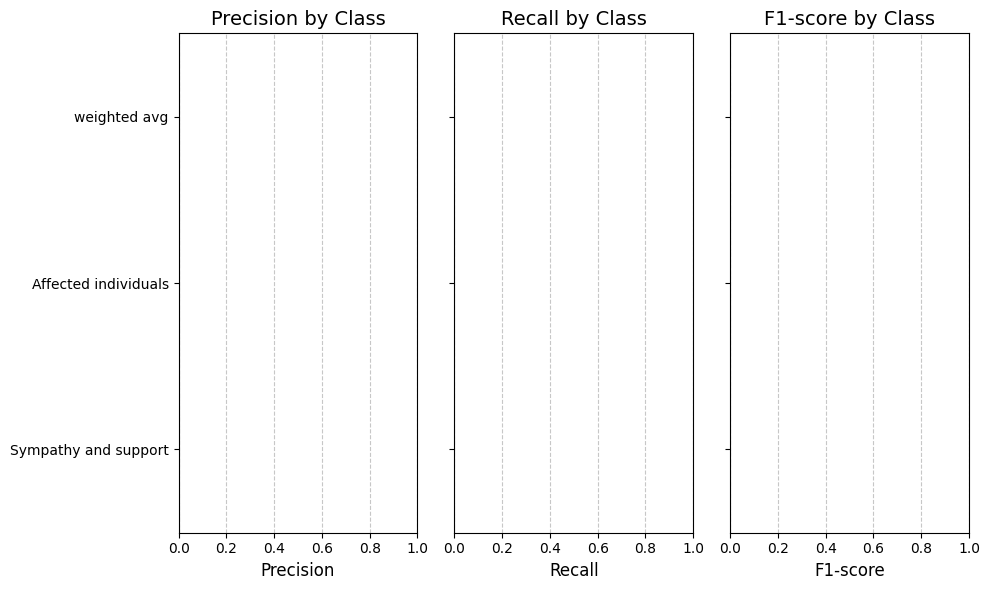

                      precision  recall  f1-score  support
weighted avg                0.0     0.0       0.0      1.0
Affected individuals        0.0     0.0       0.0      0.0
Sympathy and support        0.0     0.0       0.0      1.0


In [37]:
import src.structure_extractor.evaluation as e

actual = test_df['Information Type']
predicted = test_df['parsed_response']

e.class_metrics(actual_values=actual, predicted_values=predicted)